# Исследовательский анализ заведений общественного питания Москвы

- Автор:Третьякова Татьяна
- Дата: 09.11.2025

### Цели и задачи проекта
<font color='#777778'>**Цель:** Проведение исследовательского анализа заведенияй общественного питания Москвы, на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. С целью получения дополнительной информации при  выборе подходящего места для нового объекта.
    
**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить взаимосвязь данных в столбцах `category`, `hours`, `rating`, `district`, `chain` с другими данными.
4. Сформулировать выводы по проведённому анализу.
   </font>

### Описание данных

<font color='#777778'>Для анализа поступили данные данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные состоят из двух датасетов:

- `rest_info.csv` — информация о заведениях общественного питания;
- `rest_price.csv` —  информация о среднем чеке в
заведениях общественного питания.

### Описание датасета `rest_info.csv`

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки): 
0 — заведение не является сетевым;
1 — заведение является сетевым.
- `seats` — количество посадочных мест.

### Описание датасета `rest_price.csv`

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»: 
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»: 
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

</font>

### Содержимое проекта 

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

---

## Загрузка данных и знакомство с ними

- Начнём с загрузки библиотек и датасетов. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `rest_df` и `price_df`. Путь к файлам данных о заведениях общественного питания Москвы.: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
# Выгружаем данные в переменные bank_df и clients_df
rest_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`: 

In [4]:
# Выводим первые строки датафрейма на экран
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим информацию о датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Познакомимся с данными датасета `rest_price.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [6]:
# Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена общая информация о объектах питания.
После первичного анализа данных можно сделать следующие выводы:
Все представленные данные содержат числовые значения и хранятся в типах данных int64 или float64. 
Значения в столбце `chain` — это целые числа. Они указывают, есть ли у объекта сетевой признак. Возможные значения — 1 или 0. Размерность этих данных можно уменьшить.

Пропуски содержатся в столбце `hours` и `seats`. 
Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о средней стоимости услуг.
Пропуски существенны и содержатся в столбцах `price`, `avg_bill`, `middle_avg_bill`, и `middle_coffee_cup`.
Типы данных соответствуют содержимому. 
Значения в столбцах соответствуют описанию.

Первичное знакомство показывает, что данные хорошего качества — в них практически нет пропущенных значений, а сами данные соответствуют описанию и выглядят корректными. 

### Подготовка единого датафрейма

- Объединим данные двух датасетов в один (`df`), с которым и продолжим работу.

In [20]:
df=rest_df.merge(price_df, on='id', how='left')
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


## Предобработка данных

Подготовим данные к исследовательскому анализу:

- Изучим корректность типов данных и при необходимости проведем их преобразование.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [10]:
# Оптимизируем целочисленный тип данных 
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')


In [11]:
# Проверим типы данных в датафрейме df с помощью атрибута dtypes
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

- Изучим пропущенные значения в данных: посчитаем их количество в каждом столбце датафрейме, изучим данные с пропущенными значениями и предположим гипотезы их появления. Проведем обработку пропущенных значений: заменим пропуски на определённое значение, или удалим строки с пропусками или оставим их как есть.

При первичном анализе мы обнаружили пропуски в столбцах датафрейма `df`. Узнаем абсолютное и относительное количество пропусков.

In [12]:
# Применяем метод isna() к датафрейму df
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [13]:
# Подсчитываем долю строк с пропусками
df.isna().sum() / df.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

В объединенном датафрейме `df` обнаружены пропуски в столбцах:
* `price` — 61% 
* `seats` - 43%
* `avg_bill` - 55%
* `middle_avg_bill` - 63%
* `middle_coffee_cup` - 94% данных.  

Количество пропусков достаточно большое, чтобы их просто удалить.
Пропуски в данных столбцах могут быть вызваны неполными данными, которые пользователи добавляют самостоятельно, или отсутствием информации в открытых источниках.
В целях исследования информация в данных столбцах носит исключительно справочный характер.
Пропуски в столбце `hours` составили 6%, что не является существенным для общего исследования.

- Проверим данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуем данные в текстовых столбцах.

In [14]:
# Проверяем полные дубликаты в датафрейме df
df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. Проверим неявные дубликаты — значения по id должны быть уникальными, то есть каждая строка в данных — уникальный объект:

In [15]:
# Проверяем неявные дубликаты в датафрейме df
df.duplicated(subset='id').sum()

0

Всё хорошо — каждая строка соответствует уникальному объекту. 

`Проверим уникальное сочетание наименования и адреса:`

In [16]:
# Избавимся от лишних пробелов в начале и в конце методом str.strip():
df['name'] = df['name'].str.strip()
df['address'] = df['address'].str.strip()
# Считаем количество уникальных значений названий объектов
df[['name', 'address']].nunique()


name       5614
address    5753
dtype: int64

In [17]:
# Считаем количество уникальных значений наименования в нижнем регистре
display(df['name'].str.strip().str.lower().nunique())
display(df['address'].str.strip().str.lower().nunique())

5512

5752

При изменении регистра записи, анализ вывел разницу в наименовании объекта на 102 позиции и на 1 позицию в адресе объекта.  Таким образом, дубликат в записи по уникальному сочетанию наименование объекта + адрес проходит на 1 позицию из 8406, что является несущественным для общей выборки.

`Теперь проверим корректность написания категориальных значений в данных.`

In [18]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['category', 'district', 'price']:
    display(f'Уникальные значения в столбце {column}:')
    display(df[column].sort_values().unique())
    

'Уникальные значения в столбце category:'

array(['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня',
       'пиццерия', 'ресторан', 'столовая'], dtype=object)

'Уникальные значения в столбце district:'

array(['Восточный административный округ',
       'Западный административный округ',
       'Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Центральный административный округ',
       'Юго-Восточный административный округ',
       'Юго-Западный административный округ',
       'Южный административный округ'], dtype=object)

'Уникальные значения в столбце price:'

array(['высокие', 'выше среднего', 'низкие', 'средние', nan], dtype=object)

В обозначении категорий, округов, прайса нет ошибок.

- Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [28]:
# Определяем функцию, которая создаст новый столбец с бинарным признаком в зависимости от наличия данных в другом столбце
def create_is_na(hours_str):
    """
    Функция создаёт новый столбец с бинарным признаком, который указывает
    на наличие данных в столбце. Функция применяется к столбцу после метода isna()
    """
    if pd.isna(hours_str):  # Если данные отсутствуют
        return False
    hours_str = str(hours_str).lower().strip()
   # Проверяем комбинацию "ежедневно" и "круглосуточно"
    if 'ежедневно' in hours_str and 'круглосуточно' in hours_str:
        return True
        
    return False

In [29]:
# Создаём столбец is_24_7 с помощью функции create_is_na
df['is_24_7'] = df['hours'].apply(create_is_na)

In [32]:
# Проводим агрегацию данных по полю is_24_7
df.groupby('is_24_7').agg({
    'rating':'mean',
    'seats':'mean',
    'middle_avg_bill':'mean',
    'middle_coffee_cup':'mean'
})
     

,rating,seats,middle_avg_bill,middle_coffee_cup
is_24_7,,,,
False,4.244880,110.131507,966.633254,173.250000
True,4.072329,90.375904,847.088496,225.733333


Можно сделать следующие выводы о связи между данными по графику работы в столбце `is_24_7` и другими характеристиками объектов:

В объектах с круглосуточным графиком работы выше средний чек за чашку кофе и ниже средняя стоимость счета, чем в объектах с регламентированным графиком работы.

Несмотря на это, средний рейтинг объекта по мнению клиентов ниже при круглосуточном обслуживании.


---

### Промежуточный вывод


Предоставленные данные хорошего качества и требуют не так много действий по предобработке.
В результате предобработки данных были выполнены следующие действия:

Изучены пропуски в данных.
Пропуски обнаружились в столбцах с дополнительной информацией из открытых источников. Учитывая это, пропуски могут отражать особенности использования объектов общепита клиентами и не являться ошибкой в данных. Поэтому их оставили как есть.

Данные проверили на явные и неявные дубликаты — существенных корректировок при работе с дубликатами не требуется.

## Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [61]:
# Проверяем распределение данных по значениям столбца category
display('Распределение данных по значениям столбца category:')
df['category'].value_counts()

'Распределение данных по значениям столбца category:'

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

Результаты показывают, что всего в выборке представлено 8 уникальных объектов. Причем кафе, ресторан и кофейня представлены в Москве в большем количестве, а наименьшее количество — это столовые и булочные.

При сравнении статистических показателей разных категорий стоит обратить внимание на разницу в количественной выборке между объектами: например, кафе — 2378 объектов, и булочная — 256 объектов.

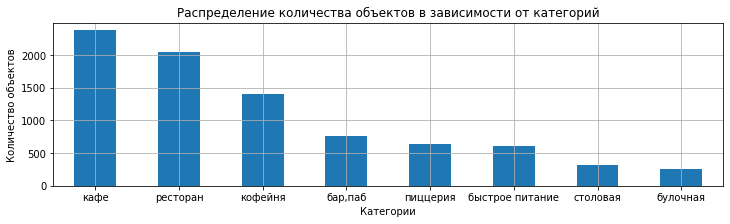

In [63]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества объектов в зависимости от категорий'
)

# Настраиваем оформление графика
plt.xlabel('Категории')
plt.ylabel('Количество объектов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Из категорий по объектам `кафе`,  `ресторан`, `кофейня` значительно преобладают. Наибольшей популярностью по количетву представленных объектов является `кафе`.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [73]:
# Проверяем распределение данных по значениям столбца district
display('Распределение данных по значениям столбца district:')
df['district'].value_counts()

'Распределение данных по значениям столбца district:'

Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

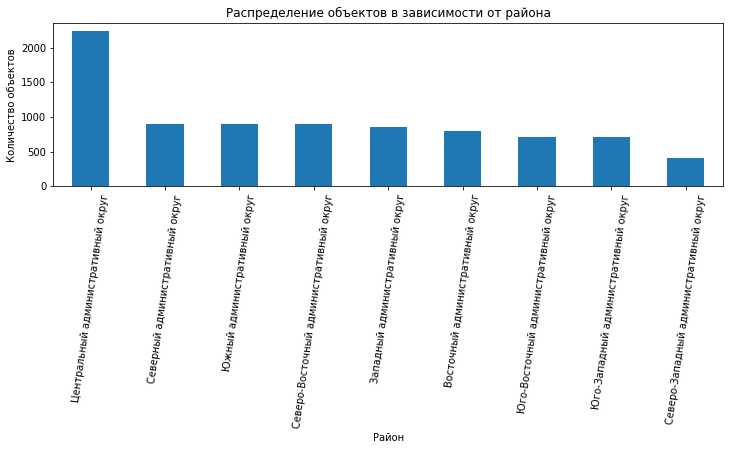

In [100]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['district'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=82, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение объектов в зависимости от района'
)

# Настраиваем оформление графика
plt.xlabel('Район')
plt.ylabel('Количество объектов')


# Выводим график
plt.show()

Наибольшее значение объектов сосредоточено в Центральном административном округе — 2243 объекта, наименьшее — в Северо-Западном, это 409 объектов. По остальным направлениям распределение примерно одинаковое, в среднем от 900 до 700 объектов.

In [33]:
#отдельно распределение заведений каждой категории в Центральном административном округе Москвы.
display('Распределение категорий в ЦАО:')
display(df[df['district'] == "Центральный административный округ"]['category'].value_counts())

'Распределение категорий в ЦАО:'

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

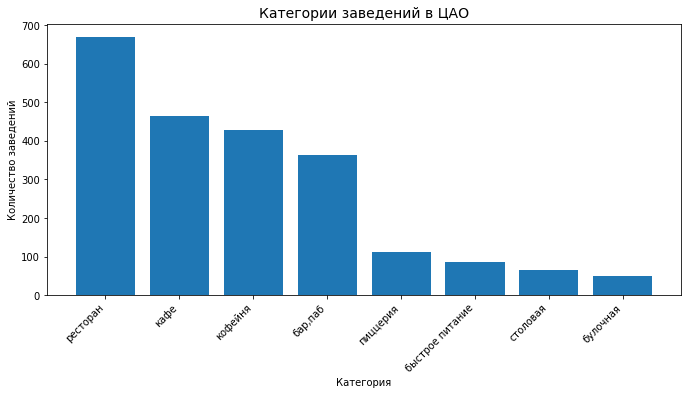

In [58]:
# Фильтруем ЦАО
cao_df = df[df['district'] == "Центральный административный округ"]

plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
category_counts = cao_df['category'].value_counts()
top_categories = category_counts.head(15)

bars = plt.bar(range(len(top_categories)), top_categories.values)
plt.title('Категории заведений в ЦАО', fontsize=14)
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.xticks(range(len(top_categories)), top_categories.index, rotation=45, ha='right')
plt.show()

Рестораны, кафе и кофейни все так же в приоритете.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [92]:
# Посчитаем соотношение сетевых и несетевых заведений в целом по всем данным

display(f'Распределение объектов по значениям столбца chain (1- Сетевые, 0 - Несетевые):')
df.groupby('chain')['id'].nunique()

'Распределение объектов по значениям столбца chain (1- Сетевые, 0 - Несетевые):'

chain
0    5201
1    3205
Name: id, dtype: int64

Расчет показал, что в Москве в 2022 году несетевых объектов общественного питания было на 62,3% больше, чем сетевых.

In [47]:
display('Соотношение сетевых и несетевых заведений по категориям:')

# Считаем общее количество заведений по категориям
total_by_category = df.groupby('category')['id'].nunique()

# Считаем сетевые заведения по категориям
chain_by_category = df[df['chain'] == 1].groupby('category')['id'].nunique()
chain_by_category_non = df[df['chain'] == 0].groupby('category')['id'].nunique()

# Считаем доли
result = pd.DataFrame({
    'Всего заведений': total_by_category,
    'Сетевые': chain_by_category,
    'Несетевые':chain_by_category_non,
    'Доля сетевых (%)': (chain_by_category / total_by_category * 100).round(2)
}).fillna(0)

display(result.sort_values('Доля сетевых (%)', ascending=False))

'Соотношение сетевых и несетевых заведений по категориям:'

,Всего заведений,Сетевые,Несетевые,Доля сетевых (%)
category,,,,
булочная,256,157,99,61.33
пиццерия,633,330,303,52.13
кофейня,1413,720,693,50.96
быстрое питание,603,232,371,38.47
ресторан,2043,730,1313,35.73
кафе,2378,779,1599,32.76
столовая,315,88,227,27.94
"бар,паб",765,169,596,22.09


<Figure size 1080x720 with 0 Axes>

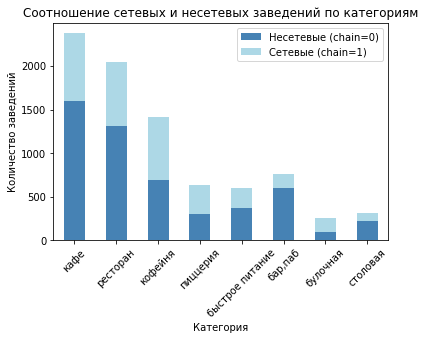

In [90]:
# Посчитаем соотношение сетевых и несетевых заведений в разрезе категорий заведения 

pivot_table = df.groupby(['category', 'chain'])['id'].nunique().unstack(fill_value=0)
pivot_table = pivot_table.sort_values(1, ascending=False).head(8)  

# Строим график
plt.figure(figsize=(15, 10))
pivot_table.plot(kind='bar', stacked=True, color=['steelblue', 'lightblue'])
plt.title('Соотношение сетевых и несетевых заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.legend(['Несетевые (chain=0)', 'Сетевые (chain=1)'])
plt.xticks(rotation=45)
plt.show()


Видим, что категории заведений: `булочная`, `пиццерия`, `кофейня` чаще являются сетевыми, а `кафе` и `ресторан` больше представлены как несетевые объекты.

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [125]:
# Посчитаем количество посадочных мест в заведениях:
seats_stats = df.groupby('category')['seats'].agg([ 'mean', 'median', 'min', 'max']).round(1)
display('Статистика по местам:')
display(seats_stats.sort_values('median', ascending=False))

'Статистика по местам:'

,mean,median,min,max
category,,,,
ресторан,121.9,86.0,0.0,1288.0
"бар,паб",124.5,82.5,0.0,1288.0
кофейня,111.2,80.0,0.0,1288.0
столовая,99.8,75.5,0.0,1200.0
быстрое питание,98.9,65.0,0.0,1040.0
кафе,97.5,60.0,0.0,1288.0
пиццерия,94.5,55.0,0.0,1288.0
булочная,89.4,50.0,0.0,625.0


<Figure size 1080x576 with 0 Axes>

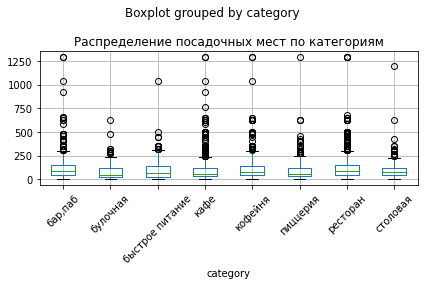

In [137]:
# Боксплот по категориям (по медиане)
top_categories = df.groupby('category')['seats'].median().sort_values(ascending=False).head(8).index

plt.figure(figsize=(15, 8))

df[df['category'].isin(top_categories)].boxplot(column='seats', by='category', rot=45)
plt.title('Распределение посадочных мест по категориям')
plt.tight_layout()
plt.show()


В процессе исследования количества посадочных мест в заведениях в данных встречаются аномально высокие значения (выбросы). Данные по посадочным местам получены из публичных источников и являются оценочным значением заполняющего, в них возможны ошибки.

Для каждой категории заведений наиболее типичное количество посадочных мест представлено ниже с ограничением по количеству мест в 160.

In [172]:
# Уберем явные выбросы (больше 160 мест)
reasonable_seats = df[df['seats'] <= 160]
display('Среднее количество мест (без выбросов):')
clean_result = reasonable_seats.groupby('category')['seats'].mean().sort_values(ascending=False)
display(clean_result)

'Среднее количество мест (без выбросов):'

category
ресторан           72.302349
бар,паб            70.449864
столовая           67.513889
кофейня            64.228715
кафе               58.654599
быстрое питание    58.163121
пиццерия           54.601719
булочная           53.593496
Name: seats, dtype: float64

<Figure size 1080x576 with 0 Axes>

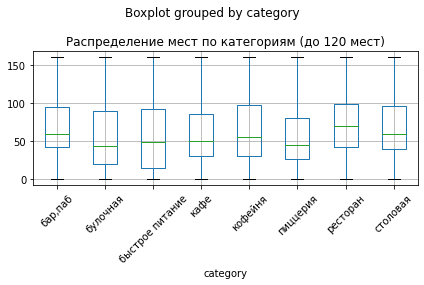

In [173]:
# Постоим боксплот без выбросов
reasonable_data = df[df['seats'] <= 160]  # смотрим до 160 мест

plt.figure(figsize=(15, 8))
reasonable_data.boxplot(column='seats', by='category', rot=45)
plt.title('Распределение мест по категориям (до 120 мест)')
plt.tight_layout()
plt.show()

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [174]:
# Посчитаем рейтинг в заведениях:
seats_stats = df.groupby('category')['rating'].agg([ 'mean', 'median', 'min', 'max']).round(1)
display('Рейтинг заведений:')
display(seats_stats.sort_values('median', ascending=False))

'Рейтинг заведений:'

,mean,median,min,max
category,,,,
"бар,паб",4.4,4.4,1.1,5.0
булочная,4.3,4.3,1.3,5.0
кофейня,4.3,4.3,1.4,5.0
пиццерия,4.3,4.3,1.0,5.0
ресторан,4.3,4.3,1.0,5.0
столовая,4.2,4.3,1.0,5.0
быстрое питание,4.1,4.2,1.1,5.0
кафе,4.1,4.2,1.0,5.0


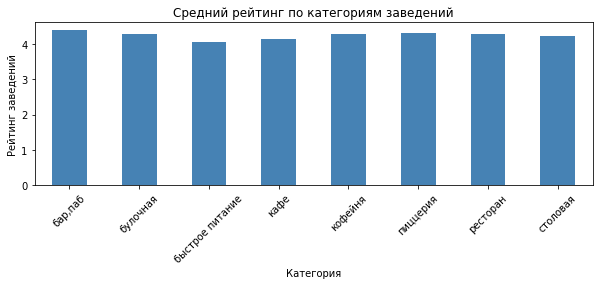

In [183]:
pivot_table = df.groupby(['category'])['rating'].agg('mean')

# Строим график
plt.figure(figsize=(10, 3))
pivot_table.plot(kind='bar', stacked=True, color=['steelblue'])
plt.title('Cредний рейтинг по категориям заведений')
plt.xlabel('Категория')
plt.ylabel('Рейтинг заведений')

plt.xticks(rotation=45)
plt.show()

Средние рейтинги заведений в разных категориях объектов общественного питания почти идентичны для различных типов и находятся в промежутке от 4.4 до 4.1.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? 

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


---


---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

Анализ взаимосвязи данных показал, что:

- Наибольший процент нелояльных клиентов фиксируется среди клиентов из Ростова Великого (32%), при этом среди женщин также выше процент нелояльных клиентов, чем среди мужчин (25% против 16%). Также существенное различие можно отметить среди возрастных групп клиентов: среди нелояльных клиентов преобладаю клиенты с возрастом 40–50 лет, тогда как среди лояльных — 30–40 лет.
- Сумма баланса клиента и его оценочная заработная плата не влияют на его лояльность. Однако клиенты, для которых не указан баланс, в целом более лояльны банку. Процент нелояльных клиентов в этом сегменте около 14%, тогда как процент нелояльных клиентов среди тех, для кого указан баланс, возрастает до 24%.
- Наличие кредитной карты и значение кредитного рейтинга в целом не влияет на отток клиентов, хотя можно отметить тенденцию к тому, среди лояльных клиентов большая часть клиентов имеет кредитный рейтинг ближе к 700, а среди нелояльных — к 600, хотя средние значения достаточно близки.
- Среди клиентов, которые не участвуют в программе лояльности, больше процент ушедших клиентов, чем среди тех, кто в программе лояльности участвует (27% против 14%).
- Количество объектов собственности, как правило, не влияет на лояльность клиентов, в отличие от количества продуктов: клиенты с одним продуктом больше склонны к уходу, чем клиенты с двумя продуктами (27% против 8%). Для клиентов с тремя и четырьмя продуктами мало данных, чтобы сделать корректные выводы.

---

## Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

В ходе исследования проанализировали данные 10000 клиентов банка «Метанпром» из трёх городов. Данные включали персональную информацию клиентов и особенности использования услуг банка. Акцент исследования был на том, чтобы найти взаимосвязи между уходом клиентов и другими факторами. Среди них: возраст и город проживания клиента, текущий баланс и оценочная заработная плата, кредитный рейтинг и наличие кредитной карты, участие в программе лояльности, количество объектов недвижимости и продуктов банка.

### Общий профиль клиента банка

Исследовательский анализ данных позволил сформировать профиль клиента банка:

- Из 10000 проанализированных клиентов банка половина людей проживает в Ярославле, а остальная половина в Ростове Великом и Рыбинске в равном количестве.

- 54% клиентов — женщины, а средний возраст клиентов составляет 39 лет.

- Как правило, клиенты банка пользуются 1–2 продуктами. Средний баланс составляет около 120 тыс. рублей, однако для 35% клиентов нет баланса. При этом 70% клиентов оформляют кредитные карты, а 51% участвует в программах лояльности.

Ушедшие, или нелояльные, клиенты составляют 20% от всех клиентов банка.

### Факторы, влияющие на отток клиентов из банка

На значение процента клиентов, ушедших в отток, положительно влияют несколько факторов: регион регистрации клиента, его возраст и пол, а также наличие баланса в банке, участие в программе лояльности и количество используемых продуктов.

Среди ушедших клиентов преобладают:

- люди из Ростова Великого — это 32% от всех клиентов региона;

- женщины — это 25% по сравнению с 16% для клиентов-мужчин;

- клиенты возрастом от 40 до 50 лет.

Ушедшие клиенты чаще других имеют баланс в банке, не участвуют в программах лояльности и пользуются одним банковским продуктом.

### Рекомендации

В качестве рекомендаций стоит обратить внимание на удержание клиентов возраста 40–50 лет. Им можно предложить более выгодные условия кредитования или разработать для них специальные банковские продукты и увеличить вовлечённость в программы лояльности.

Дополнительно можно провести более детальную сегментацию, чтобы выделить конкретные группы клиентов.
